In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from PIL import Image
import plotly.express as px
import tqdm
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [28]:
## 1. 对RLE编码的测试

# Run-Length Encode and Decode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    print(runs)
    runs[1::2] -= runs[::2]# 1,3,5,7...-0,2,4,6...=1,1,1,1...
    print(runs)
    return ' '.join(str(x) for x in runs)
 
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# # Time Test
# masks = pd.read_csv('../input/train_masks.csv')
# num_masks = masks.shape[0]
# print('Total masks to encode/decode =', num_masks)

# time_enc = 0.0 # seconds
# time_dec = 0.0 # seconds

# for r in masks.itertuples():
#     t0 = time.clock()
#     mask = rle_decode(r.rle_mask,(1280,1918))
#     time_dec += time.clock() - t0
#     t0 = time.clock()   
#     mask_rle = rle_encode(mask)
#     time_enc += time.clock() - t0
#     #assert (mask_rle == r.rle_mask)

# print('Time full encoding = {:.4f} ms per mask'.format(1000*time_enc/num_masks))
# print('Time full decoding = {:.4f} ms per mask'.format(1000*time_dec/num_masks))

(1280, 1918)
[419934 419935 420846 420847 439129 439130 440041 440042 460050 460051
 460962 460963 477402 477404 478314 478315 479225 479227 480137 480138
 481048 481050 481960 481962 482872 482874]
[419934      1 420846      1 439129      1 440041      1 460050      1
 460962      1 477402      2 478314      1 479225      2 480137      1
 481048      2 481960      2 482872      2]


'419934 1 420846 1 439129 1 440041 1 460050 1 460962 1 477402 2 478314 1 479225 2 480137 1 481048 2 481960 2 482872 2'

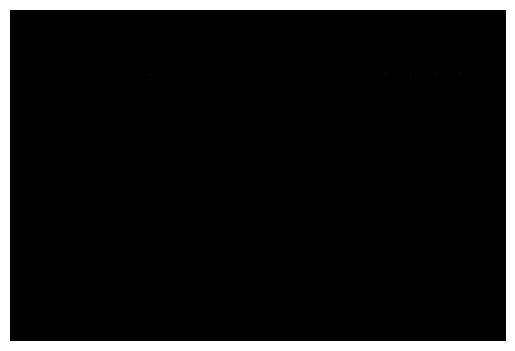

In [29]:
test_RLE = '419934 1 420846 1 439129 1 440041 1 460050 1 460962 1 477402 2 478314 1 479225 2 480137 1 481048 2 481960 2 482872 2'

test_mask = rle_decode(test_RLE, (1280, 1918))
print(test_mask.shape)

# 使用virdis配色方案
sns.set_palette('cividis')
# 不要显示网格
plt.grid(False)
# 不显示坐标轴
plt.axis('off')

plt.imshow(test_mask,cmap='gray')

test_RLE = rle_encode(test_mask)
test_RLE

In [30]:
kidney_1_dense_images_path = './kaggle/input/blood-vessel-segmentation/train/kidney_1_dense/images/'
kidney_1_dense_labels_path = './kaggle/input/blood-vessel-segmentation/train/kidney_1_dense/labels/'
kidney_1_voi_images_path = './kaggle/input/blood-vessel-segmentation/train/kidney_1_voi/images/'
kidney_1_voi_labels_path = './kaggle/input/blood-vessel-segmentation/train/kidney_1_voi/labels/'
kindey_2_images_path = './kaggle/input/blood-vessel-segmentation/train/kidney_2/images/'
kindey_2_labels_path = './kaggle/input/blood-vessel-segmentation/train/kidney_2/labels/'
kindey_3_dense_images_path = './kaggle/input/blood-vessel-segmentation/train/kidney_3_dense/images/'
kindey_3_dense_labels_path = './kaggle/input/blood-vessel-segmentation/train/kidney_3_dense/labels/'
kindey_3_sparse_images_path = './kaggle/input/blood-vessel-segmentation/train/kidney_3_sparse/images/'
kindey_3_sparse_labels_path = './kaggle/input/blood-vessel-segmentation/train/kidney_3_sparse/labels/'
all_rle_label_path = './kaggle/input/blood-vessel-segmentation/train_rles.csv'

In [31]:
# 2. 对图片进行分析
# 测试A：kindey_3的 sparse 是否是从 dense 中抽取的

# 2.1 读取图片
kidney_3_sparse_images = os.listdir(kindey_3_sparse_images_path)
kidney_3_sparse_labels = os.listdir(kindey_3_sparse_labels_path)
kindey_3_dense_labels = os.listdir(kindey_3_dense_labels_path)
kindey_2_images = os.listdir(kindey_2_images_path)
kindey_2_labels = os.listdir(kindey_2_labels_path)
kindey_1_dense_images = os.listdir(kidney_1_dense_images_path)
kindey_1_dense_labels = os.listdir(kidney_1_dense_labels_path)
kindey_1_voi_images = os.listdir(kidney_1_voi_images_path)
kindey_1_voi_labels = os.listdir(kidney_1_voi_labels_path)
all_rle_label = pd.read_csv(all_rle_label_path)

In [32]:
kidney_3_sparse_images

['0000.tif',
 '0001.tif',
 '0002.tif',
 '0003.tif',
 '0004.tif',
 '0005.tif',
 '0006.tif',
 '0007.tif',
 '0008.tif',
 '0009.tif',
 '0010.tif',
 '0011.tif',
 '0012.tif',
 '0013.tif',
 '0014.tif',
 '0015.tif',
 '0016.tif',
 '0017.tif',
 '0018.tif',
 '0019.tif',
 '0020.tif',
 '0021.tif',
 '0022.tif',
 '0023.tif',
 '0024.tif',
 '0025.tif',
 '0026.tif',
 '0027.tif',
 '0028.tif',
 '0029.tif',
 '0030.tif',
 '0031.tif',
 '0032.tif',
 '0033.tif',
 '0034.tif',
 '0035.tif',
 '0036.tif',
 '0037.tif',
 '0038.tif',
 '0039.tif',
 '0040.tif',
 '0041.tif',
 '0042.tif',
 '0043.tif',
 '0044.tif',
 '0045.tif',
 '0046.tif',
 '0047.tif',
 '0048.tif',
 '0049.tif',
 '0050.tif',
 '0051.tif',
 '0052.tif',
 '0053.tif',
 '0054.tif',
 '0055.tif',
 '0056.tif',
 '0057.tif',
 '0058.tif',
 '0059.tif',
 '0060.tif',
 '0061.tif',
 '0062.tif',
 '0063.tif',
 '0064.tif',
 '0065.tif',
 '0066.tif',
 '0067.tif',
 '0068.tif',
 '0069.tif',
 '0070.tif',
 '0071.tif',
 '0072.tif',
 '0073.tif',
 '0074.tif',
 '0075.tif',
 '0076.tif',

In [33]:
# 根据RLE的第一列作为做引，找到对应的label
df = pd.read_csv('./kaggle/input/blood-vessel-segmentation/train_rles.csv')
df['subset']=df['id'].map(lambda x:'_'.join(x.split('_')[:-1]))
df.head()

,id,rle,subset
0,kidney_1_dense_0000,1 0,kidney_1_dense
1,kidney_1_dense_0001,1 0,kidney_1_dense
2,kidney_1_dense_0002,1 0,kidney_1_dense
3,kidney_1_dense_0003,1 0,kidney_1_dense
4,kidney_1_dense_0004,1 0,kidney_1_dense


In [34]:
print("Number of unique slices:", df['id'].nunique())
print("Number of unique datasets:", df['id'].str.split('_').str[0].nunique())


Number of unique slices: 7429
Number of unique datasets: 1


In [35]:
df['mask_length'] = df['rle'].apply(lambda x: len(str(x).split()))
# 这个并非像素数，而是RLE编码的长度。也就是展平后有多少段
fig = px.histogram(df, x='mask_length', nbins=20,
                   labels={'mask_length': 'Number of Pixels in Mask', 'count': 'Frequency'},
                   title='Distribution of Segmentation Mask Lengths',
                   marginal="box",  # or violin, rug
                   color_discrete_sequence=['skyblue'])

fig.update_layout(bargap=0.1)
fig.show()

In [36]:
def count_mask_pixel_number(rle_data):
    '''
    rle_data: str, rle data
    return: int, number of pixels in mask
    '''
    # the odd number of the splited result is the number of the pixel number of that part
    splited_list = rle_data.split(' ')
    pixel_number = 0
    for i in range(0, len(splited_list), 2):
        pixel_number += int(splited_list[i+1])
        
    return pixel_number

df['mask_pixel_number'] = df['rle'].apply(lambda x: count_mask_pixel_number(x))

In [37]:
fig = px.histogram(df, x='mask_pixel_number', nbins=20,
                     labels={'mask_pixel_number': 'Number of Pixels in Mask', 'count': 'Frequency'},
                     title='Distribution of Segmentation Mask Lengths',
                     marginal="box",  # or violin, rug
                     color_discrete_sequence=['skyblue'])

fig.update_layout(bargap=0.1)
fig.show()


(1706, 1510)


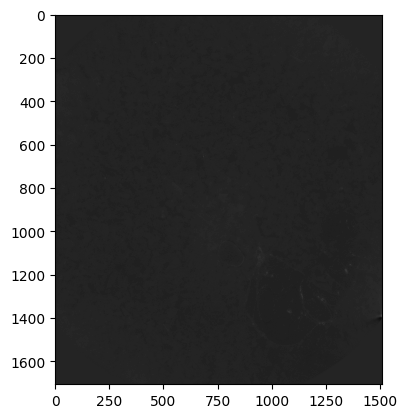

In [38]:
# read a sample image
sample_image = Image.open(kindey_3_sparse_images_path + kidney_3_sparse_images[0])
sample_image = np.array(sample_image)
print(sample_image.shape)
plt.imshow(sample_image, cmap='gray')

(1706, 1510)


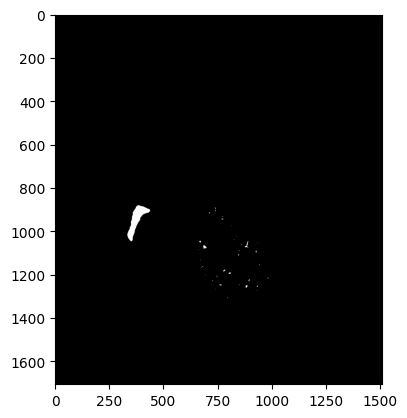

In [39]:
# read a sample label
sample_label = Image.open(kindey_3_sparse_labels_path + kidney_3_sparse_labels[100])
sample_label = np.array(sample_label)
print(sample_label.shape)
plt.imshow(sample_label, cmap='gray')

In [40]:
# check if all images have the same size
# image_size = sample_image.shape
# SAME = True 
# for image_name in kidney_3_sparse_images:
#     image = Image.open(kindey_3_sparse_images_path + image_name)
#     image = np.array(image)
#     if image.shape != image_size:
#         SAME = False
#         break 
#     image_size = image.shape
    

# print(SAME)
# OUTPUT: True

# The Shape of the image is always (1706, 1510)

In [41]:
# get the shape of kindey 1 of kindey 2
sample_image = Image.open(kindey_2_images_path + kindey_2_images[0])
sample_image = np.array(sample_image)
print(sample_image.shape)
sample_label = Image.open(kindey_2_labels_path + kindey_2_labels[0])
sample_image = np.array(sample_image)
print(sample_image.shape)

(1041, 1511)
(1041, 1511)


(1303, 912)
(1303, 912)


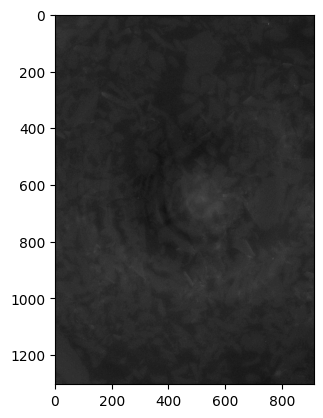

In [42]:
sample_image = Image.open(kidney_1_dense_images_path + kindey_1_dense_images[0])
sample_image = np.array(sample_image)
print(sample_image.shape)
plt.imshow(sample_image, cmap='gray')
sample_label = Image.open(kidney_1_dense_labels_path + kindey_1_dense_labels[0])
sample_image = np.array(sample_image)
print(sample_image.shape)


In [43]:
sampel_image = Image.open(kidney_1_voi_images_path + kindey_1_voi_images[0])
sample_image = np.array(sample_image)
print(sample_image.shape)
sample_label = Image.open(kidney_1_voi_labels_path + kindey_1_voi_labels[0])
sample_image = np.array(sample_image)
print(sample_image.shape)
print(kidney_1_voi_images_path + kindey_1_voi_images[0])

(1303, 912)
(1303, 912)
./kaggle/input/blood-vessel-segmentation/train/kidney_1_voi/images/0000.tif


In [44]:
df['scan'] = df['id'].apply(lambda x: x[:-5])
df['mask_is_empty'] = df['id'].apply(lambda x: x[:-5])

df['scan'] = df['id'].apply(lambda x: x[:-5])
df['mask_is_empty'] = df['rle']=='1 0'

In [45]:
fig = px.histogram(df, y='scan', title='Number of Images per Scan', labels={'scan': 'Scan'}, color_discrete_sequence=['skyblue'])
fig.update_layout(yaxis_title='Scan', xaxis_title='Number of Images')
fig.show()

In [46]:
x = 'scan'
y = 'mask_is_empty'

gb = df.groupby(x)[y].value_counts(normalize=True)
gb = gb.round(3)*100
gb = gb.rename('percent').reset_index()

fig = px.bar(gb, 
             x='percent',
             y='scan',
             color='mask_is_empty',
             orientation='h',
             title='Mask is Empty Percentage',
             labels={'scan': 'Scan', 'percent': 'Percentage'},
             category_orders={'scan': sorted(df['scan'].unique())},  
             color_discrete_sequence=px.colors.qualitative.Set1 
            )

for trace in fig.data:
    trace['text'] = [f"{round(val, 1)}%" for val in trace['x']]

fig.show()

In [50]:
from matplotlib import animation, rc
from pathlib import Path
def load_image(file_path):
    with Image.open(file_path) as img:
        return np.array(img)
    
def normalize_intensity(image):
    return image / 255.0

def show(sample_df, idx):
    sample = sample_df[sample_df['slice_id'] == str.zfill(f'{idx}', 4)]

    image = load_image(sample['image'].values[0])
    label = load_image(sample['label'].values[0])

    image = normalize_intensity(image)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(image, cmap='gray')
    ax2.imshow(label, cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    plt.subplots_adjust(wspace=0.05)
    plt.show()
    
def animate(sample_df, id_range):
    fig, [ax1, ax2] = plt.subplots(1, 2)
    ax1.axis('off')
    ax2.axis('off')
    images = []

    for i in id_range:
        sample = sample_df[sample_df['slice_id'] == str.zfill(f'{i}', 4)]

        image = load_image(sample['image'].values[0])
        label = load_image(sample['label'].values[0])

        image = normalize_intensity(image)
    

        im1 = ax1.imshow(image, animated=True, cmap='gray')
        im2 = ax2.imshow(label, animated=True, cmap='gray')
        
        if i == id_range[0]:
            ax1.imshow(image, cmap='gray')
            ax2.imshow(label, cmap='gray')
        
        images.append([im1, im2])

    ani = animation.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=1000)
    plt.close()
    return ani

def prepare_df(im_dir='kidney_1_dense',lb_dir='kidney_1_dense'):
    df = pd.read_csv('./kaggle/input/blood-vessel-segmentation/train_rles.csv')
    base_dir = Path('./kaggle/input/blood-vessel-segmentation/train')
    subset_df = df[df.id.str.startswith(lb_dir)].reset_index(drop=True)
    subset_df['slice_id'] = subset_df['id'].map(lambda x:x.split('_')[-1]) 
    subset_df['image'] = subset_df['slice_id'].map(lambda x: base_dir / im_dir / 'images' / f'{x}.tif')
    subset_df['label'] = subset_df['slice_id'].map(lambda x: base_dir / lb_dir / 'labels' / f'{x}.tif')
    return subset_df

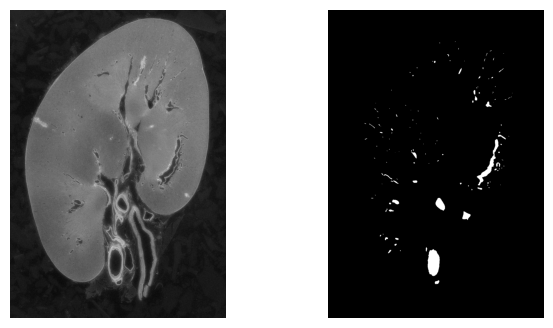

In [51]:
dense_1_df = prepare_df(im_dir='kidney_1_dense',lb_dir='kidney_1_dense')
show(dense_1_df,1234)

In [52]:

animate(dense_1_df,id_range=range(1200,1300))